In [1]:
import numpy as np
import pandas as pd
import plotly.express as px
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.graph_objs as go
import spacy
from spacy.lang.en import English
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer, TfidfVectorizer
from sklearn.pipeline import Pipeline
import re 
from wordcloud import WordCloud
import nltk
import string
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import f1_score, classification_report, ConfusionMatrixDisplay
from sklearn.linear_model import LogisticRegression
from nltk.stem import WordNetLemmatizer

import tensorflow
import keras

from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Flatten,Embedding,Activation,Dropout,SpatialDropout1D,Bidirectional,LSTM,SimpleRNN
from tensorflow.keras.layers import Conv1D,MaxPooling1D,GlobalAveragePooling1D,GlobalMaxPooling1D

import pandas as pd
from sklearn.model_selection import train_test_split
import nltk
from nltk.corpus import stopwords
import re
from nltk.stem import WordNetLemmatizer
from keras.layers import LSTM


In [2]:
# https://matplotlib.org/stable/tutorials/introductory/customizing.html 

# для темной темы jupyter
plt.rcParams.update({
    "axes.grid": True,
    "grid.color": "1",
    "grid.linestyle": "--",
    "xtick.bottom": True,
    "ytick.left": True,
    "figure.facecolor": "#111111",
    "axes.facecolor": "#212121",
    "text.color": "white",
    "xtick.color": "white",
    "ytick.color": "white",
    "axes.labelcolor": "white",
    "axes.spines.top": False,
    "axes.spines.right": False,
    "axes.edgecolor": "white",
    "grid.alpha": .3,
    "figure.figsize": [10, 5]
})

# для темной темы colab
# sns.set_style({"figure.facecolor": "#1E1E1E",
#                "axes.facecolor": "#383838"})

# <center>ДЗ 13. RNN</center>

In [3]:
df = pd.read_csv('IMDB Dataset.csv', delimiter=',')
df['sentiment'].replace({'positive' : 1 , 'negative' : 0} , inplace = True)
pd.set_option('display.max_colwidth', 180)
df.head(20)

,review,sentiment
0,"One of the other reviewers has mentioned that after watching just 1 Oz episode you'll be hooked. They are right, as this is exactly what happened with me.<br /><br />The first ...",1
1,"A wonderful little production. <br /><br />The filming technique is very unassuming- very old-time-BBC fashion and gives a comforting, and sometimes discomforting, sense of rea...",1
2,"I thought this was a wonderful way to spend time on a too hot summer weekend, sitting in the air conditioned theater and watching a light-hearted comedy. The plot is simplistic...",1
3,Basically there's a family where a little boy (Jake) thinks there's a zombie in his closet & his parents are fighting all the time.<br /><br />This movie is slower than a soap ...,0
4,"Petter Mattei's ""Love in the Time of Money"" is a visually stunning film to watch. Mr. Mattei offers us a vivid portrait about human relations. This is a movie that seems to be ...",1
5,"Probably my all-time favorite movie, a story of selflessness, sacrifice and dedication to a noble cause, but it's not preachy or boring. It just never gets old, despite my havi...",1
6,I sure would like to see a resurrection of a up dated Seahunt series with the tech they have today it would bring back the kid excitement in me.I grew up on black and white TV ...,1
7,"This show was an amazing, fresh & innovative idea in the 70's when it first aired. The first 7 or 8 years were brilliant, but things dropped off after that. By 1990, the show w...",0
8,Encouraged by the positive comments about this film on here I was looking forward to watching this film. Bad mistake. I've seen 950+ films and this is truly one of the worst of...,0
9,"If you like original gut wrenching laughter you will like this movie. If you are young or old then you will love this movie, hell even my mom liked it.<br /><br />Great Camp!!!",1


In [4]:
print(df.shape)
print(df.info())

(50000, 2)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   review     50000 non-null  object
 1   sentiment  50000 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 781.4+ KB
None


## 2. Preprocessing

1. Removing HTML Tags

In [5]:
def clean_html(text):
    clean = re.compile('<.*?>')
    return re.sub(clean , "", text)

In [6]:
df['review'] = df['review'].apply(clean_html)

2. Lowercasing

In [7]:
def convert_lower(text):
    return text.lower()

In [8]:
df['review'] = df['review'].apply(convert_lower)

3. Removing URLs

In [9]:
def remove_url(text):
    re_url = re.compile('https?://\S+|www\.\S+')
    return re_url.sub('', text)

In [10]:
df['review'] = df['review'].apply(remove_url)

4. Removing Punctuations

In [11]:
def remove_punc(text):
    return text.translate(str.maketrans('', '', exclude))

In [12]:
exclude = string.punctuation
df['review'] = df['review'].apply(remove_punc)

5. Removing stop words

In [13]:
stopwords_english = stopwords.words('english')

In [14]:
def remove_stopwords(text):
    new_text = []
    for word in text.split():
        if word in stopwords_english:
            continue
        else:
            new_text.append(word)

    return ' '.join(new_text)

In [15]:
df['review'] = df['review'].apply(remove_stopwords)

In [18]:
combined_text = ' '.join(df['review'].astype(str))

In [19]:
wordcloud = WordCloud(width=4000, height=2000, background_color='white').generate(combined_text)

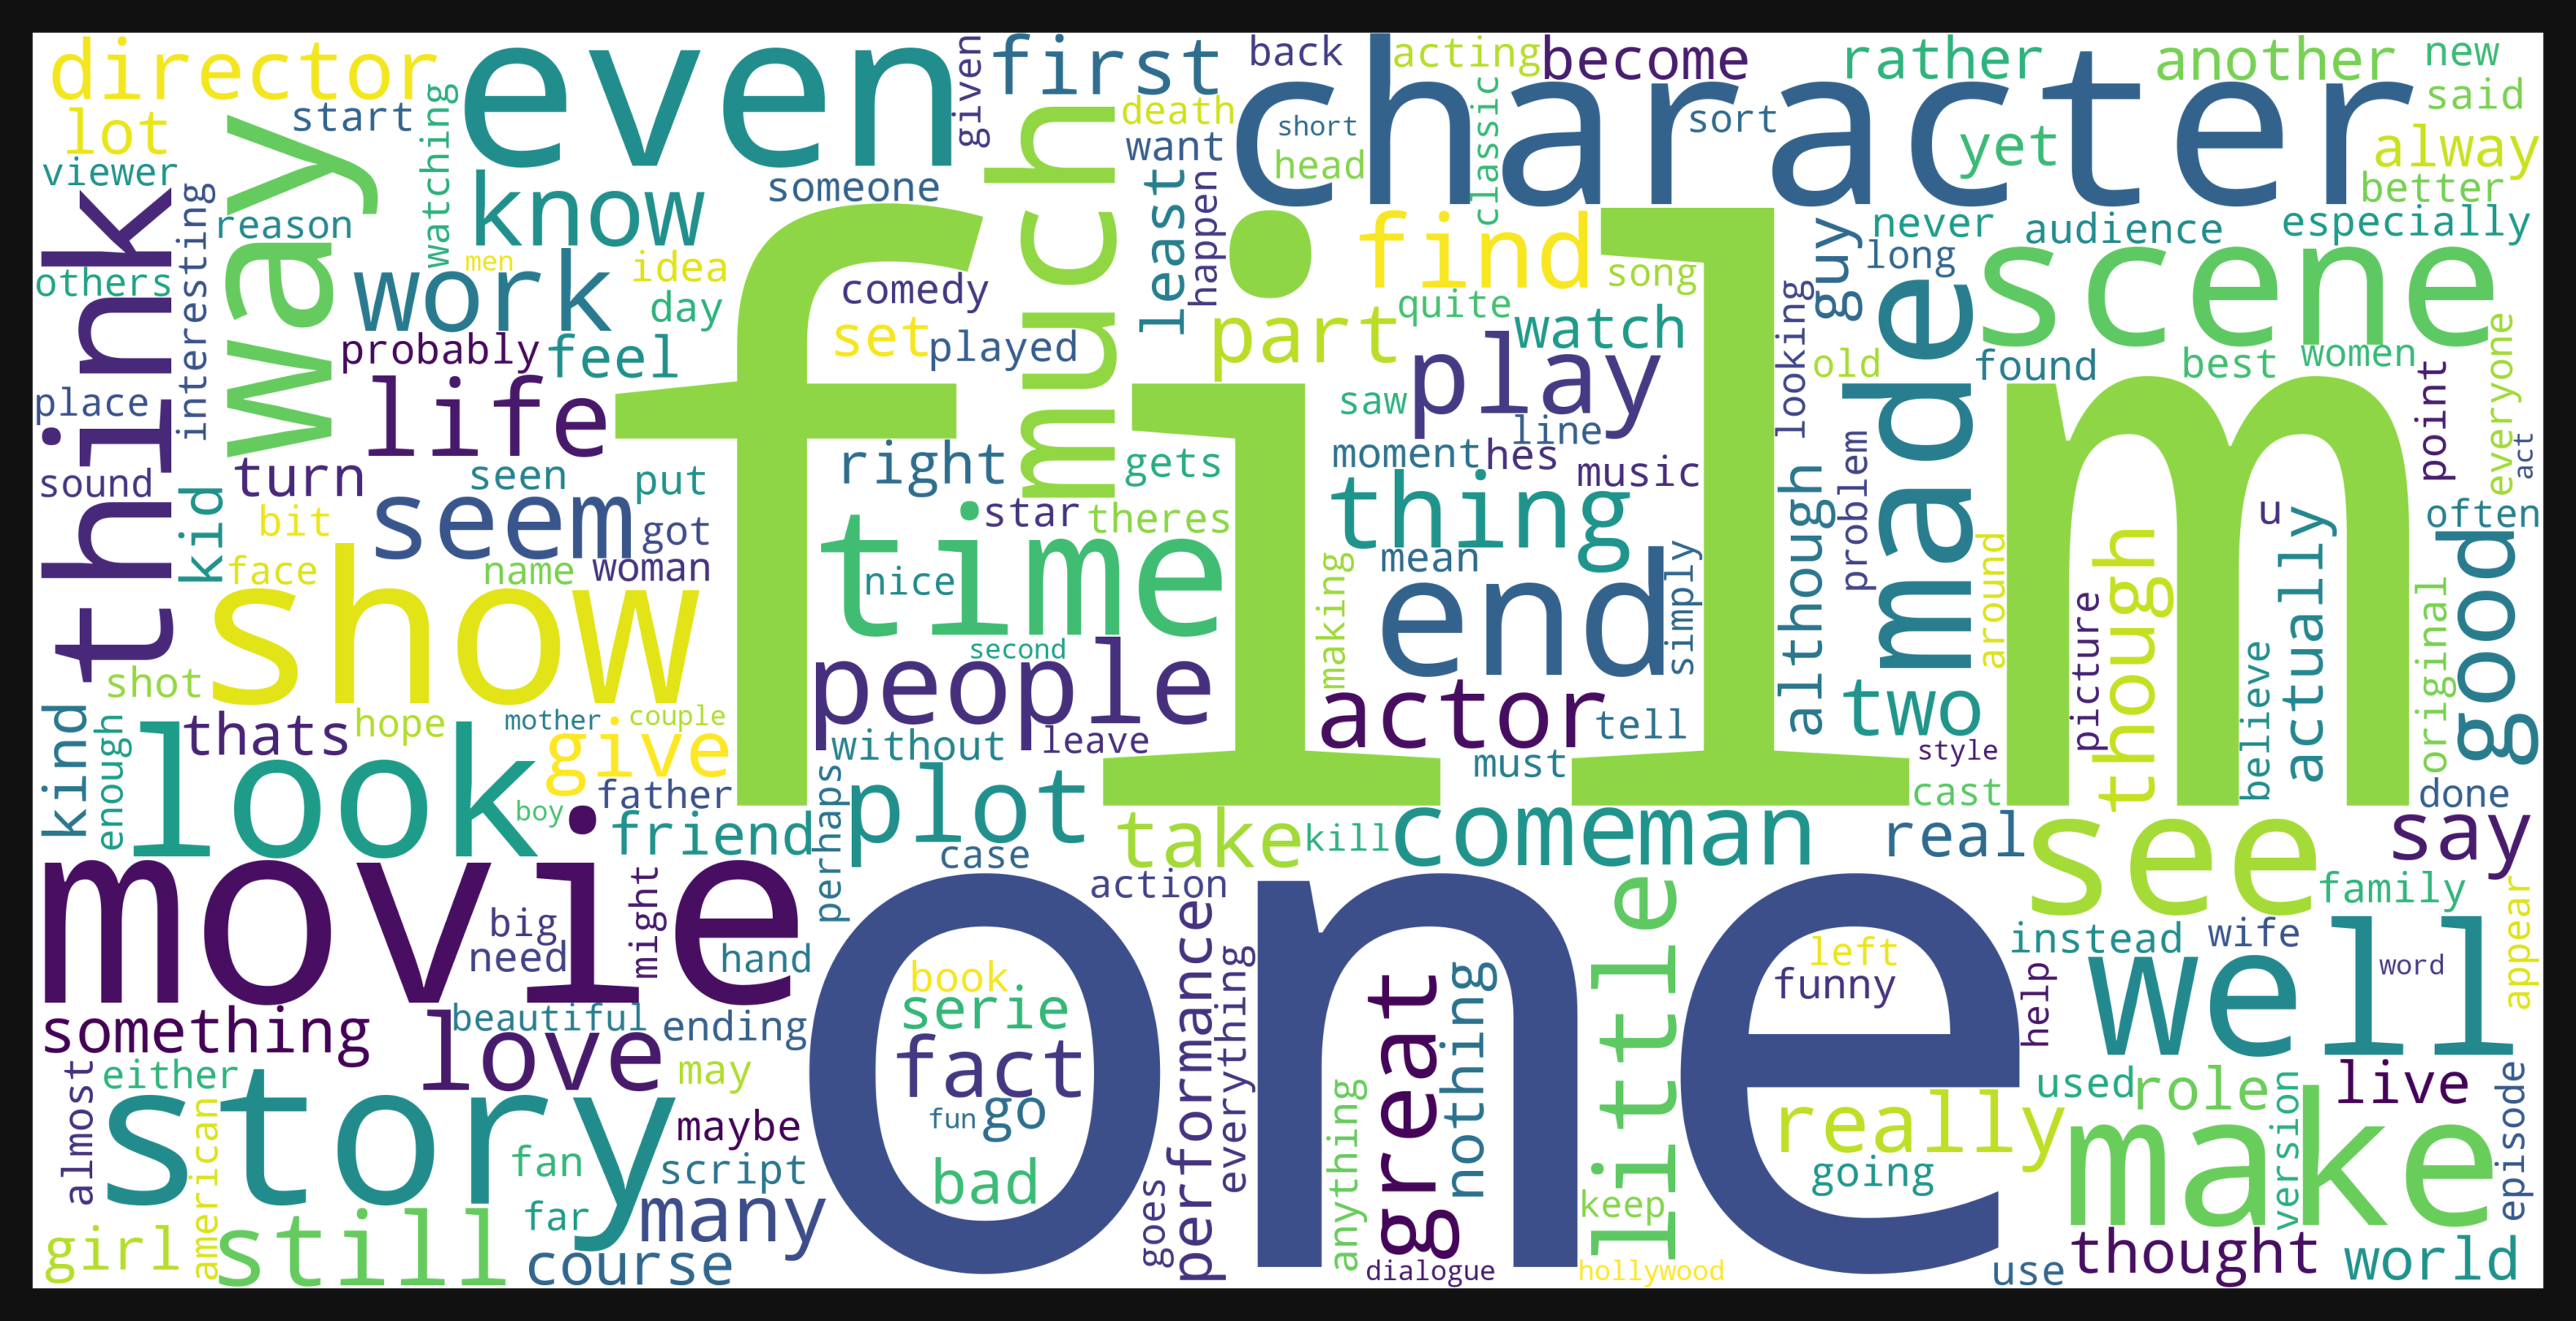

In [20]:
plt.figure(dpi=400);
plt.imshow(wordcloud, interpolation='bilinear');
plt.axis('off');

6. Lemmatizer

In [16]:
lemmatizer = WordNetLemmatizer()
def perform_lemmatizer(text):
    tokens = nltk.word_tokenize(text)
    lemmatized_tokens = [lemmatizer.lemmatize(token) for token in tokens]
    lemmatized_text = ' '.join(lemmatized_tokens)
    return lemmatized_text

In [17]:
df['review'] = df['review'].apply(perform_lemmatizer)

In [23]:
df.head(20)

,review,sentiment
0,one reviewer mentioned watching 1 oz episode youll hooked right exactly happened methe first thing struck oz brutality unflinching scene violence set right word go trust show f...,1
1,wonderful little production filming technique unassuming oldtimebbc fashion give comforting sometimes discomforting sense realism entire piece actor extremely well chosen micha...,1
2,thought wonderful way spend time hot summer weekend sitting air conditioned theater watching lighthearted comedy plot simplistic dialogue witty character likable even well brea...,1
3,basically there family little boy jake think there zombie closet parent fighting timethis movie slower soap opera suddenly jake decides become rambo kill zombieok first youre g...,0
4,petter matteis love time money visually stunning film watch mr mattei offer u vivid portrait human relation movie seems telling u money power success people different situation...,1
5,probably alltime favorite movie story selflessness sacrifice dedication noble cause preachy boring never get old despite seen 15 time last 25 year paul lukas performance brings...,1
6,sure would like see resurrection dated seahunt series tech today would bring back kid excitement mei grew black white tv seahunt gunsmoke hero every weekyou vote comeback new s...,1
7,show amazing fresh innovative idea 70 first aired first 7 8 year brilliant thing dropped 1990 show really funny anymore continued decline complete waste time todayits truly dis...,0
8,encouraged positive comment film looking forward watching film bad mistake ive seen 950 film truly one worst awful almost every way editing pacing storyline acting soundtrack f...,0
9,like original gut wrenching laughter like movie young old love movie hell even mom liked itgreat camp,1


# CNN

In [18]:
X_train, X_test,y_train,y_test = train_test_split(df['review'], df['sentiment'], test_size=0.2, random_state=66)

In [19]:
token = Tokenizer()
token.fit_on_texts(X_train)

In [20]:
train_sequences = token.texts_to_sequences(X_train)
valid_sequences = token.texts_to_sequences(X_test)

In [21]:
vocab_size = len(token.word_index) + 1
vocab_size

181994

In [31]:
maxlen = 500 # specifies the maximum length of the sequences after padding or truncating.

X_train = pad_sequences(train_sequences, maxlen=maxlen,padding = 'post')
X_test = pad_sequences(valid_sequences, maxlen=maxlen,padding = 'post')

In [33]:
vec_size = 200

cnn = Sequential()
cnn.add(Embedding(input_dim = vocab_size, output_dim = vec_size,
                    input_length=maxlen,trainable=False))

cnn.add(Conv1D(32,8,activation = 'relu'))
cnn.add(MaxPooling1D(2))
cnn.add(Dropout(0.5))

cnn.add(Dense(32,activation = 'relu'))
cnn.add(Dropout(0.5))

cnn.add(Dense(16,activation = 'relu'))

cnn.add(GlobalMaxPooling1D())

cnn.add(Dense(1,activation='sigmoid'))

In [34]:
cnn.compile(optimizer = 'adam',loss = 'binary_crossentropy' ,metrics = ['accuracy'])

In [35]:
cnn_history = cnn.fit(X_train, y_train,epochs=15, validation_data=(X_test,y_test))

Epoch 1/15
1250/1250 [==============================] - 20s 7ms/step - loss: 0.6518 - accuracy: 0.5946 - val_loss: 0.5988 - val_accuracy: 0.7114
Epoch 2/15
1250/1250 [==============================] - 8s 7ms/step - loss: 0.5592 - accuracy: 0.7114 - val_loss: 0.5703 - val_accuracy: 0.7154
Epoch 3/15
1250/1250 [==============================] - 8s 6ms/step - loss: 0.5171 - accuracy: 0.7438 - val_loss: 0.5539 - val_accuracy: 0.7183
Epoch 4/15
1250/1250 [==============================] - 8s 7ms/step - loss: 0.4849 - accuracy: 0.7667 - val_loss: 0.5473 - val_accuracy: 0.7249
Epoch 5/15
1250/1250 [==============================] - 8s 7ms/step - loss: 0.4608 - accuracy: 0.7818 - val_loss: 0.5383 - val_accuracy: 0.7348
Epoch 6/15
1250/1250 [==============================] - 8s 6ms/step - loss: 0.4402 - accuracy: 0.7946 - val_loss: 0.5153 - val_accuracy: 0.7733
Epoch 7/15
1250/1250 [==============================] - 8s 7ms/step - loss: 0.4203 - accuracy: 0.8069 - val_loss: 0.5111 - val_accuracy

In [36]:
score = cnn.evaluate(X_test, y_test)

313/313 [==============================] - 2s 6ms/step - loss: 0.5677 - accuracy: 0.6664


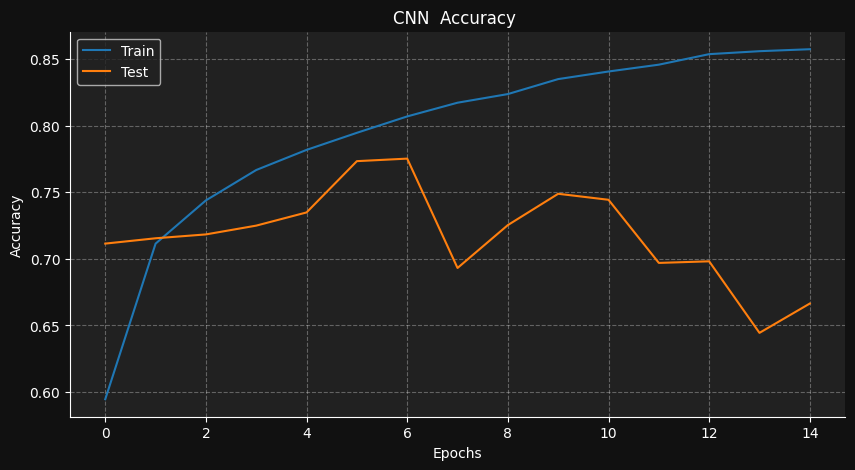

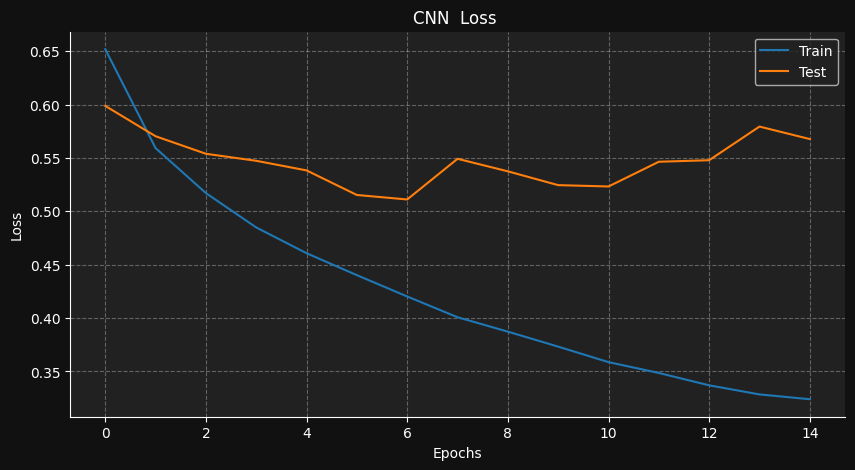

In [37]:
plt.plot(cnn_history.history['accuracy'])
plt.plot(cnn_history.history['val_accuracy'])
plt.title("CNN  Accuracy ")
plt.ylabel("Accuracy")
plt.xlabel("Epochs")
plt.legend(['Train','Test'],loc='best')
plt.show()


plt.plot(cnn_history.history['loss'])
plt.plot(cnn_history.history['val_loss'])
plt.title("CNN  Loss ")
plt.ylabel("Loss")
plt.xlabel("Epochs")
plt.legend(['Train','Test'],loc='best')
plt.show()

# LSTM 

In [58]:
vec_size = 300
maxlen = 100

X_train = pad_sequences(train_sequences, maxlen=maxlen,padding = 'post')
X_test = pad_sequences(valid_sequences, maxlen=maxlen,padding = 'post')

lstm = Sequential()
# Embedding layer
lstm.add(Embedding(input_dim = vocab_size, output_dim = vec_size, input_length=maxlen, trainable=False))
lstm.add(LSTM(200, dropout=0.20))
lstm.add(Dense(1, activation='sigmoid'))

In [59]:
lstm.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [60]:
lstm_history = lstm.fit(X_train, y_train, epochs=15, validation_data=(X_test, y_test))

Epoch 1/15
1250/1250 [==============================] - 29s 22ms/step - loss: 0.6945 - accuracy: 0.5135 - val_loss: 0.6934 - val_accuracy: 0.5090
Epoch 2/15
1250/1250 [==============================] - 26s 21ms/step - loss: 0.6901 - accuracy: 0.5221 - val_loss: 0.6873 - val_accuracy: 0.5284
Epoch 3/15
1250/1250 [==============================] - 26s 21ms/step - loss: 0.6790 - accuracy: 0.5517 - val_loss: 0.6480 - val_accuracy: 0.6433
Epoch 4/15
1250/1250 [==============================] - 26s 21ms/step - loss: 0.5701 - accuracy: 0.6977 - val_loss: 0.5039 - val_accuracy: 0.7527
Epoch 5/15
1250/1250 [==============================] - 26s 21ms/step - loss: 0.4920 - accuracy: 0.7573 - val_loss: 0.4557 - val_accuracy: 0.7872
Epoch 6/15
1250/1250 [==============================] - 27s 21ms/step - loss: 0.4579 - accuracy: 0.7776 - val_loss: 0.4427 - val_accuracy: 0.7960
Epoch 7/15
1250/1250 [==============================] - 26s 21ms/step - loss: 0.4377 - accuracy: 0.7916 - val_loss: 0.4311 -

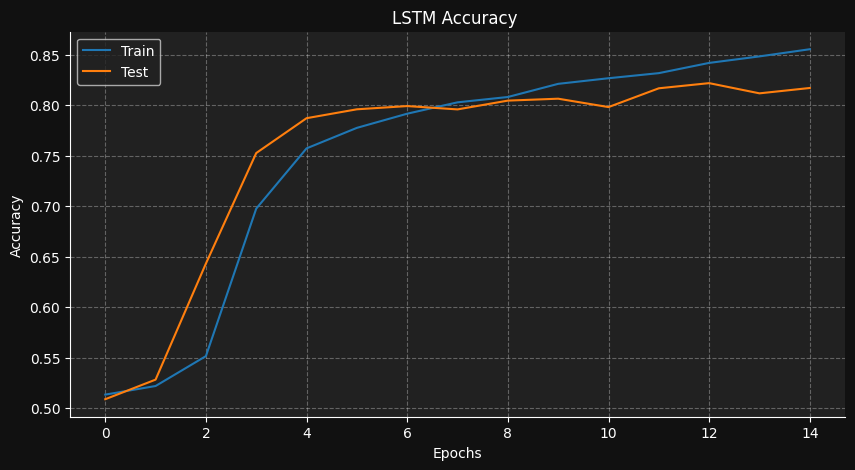

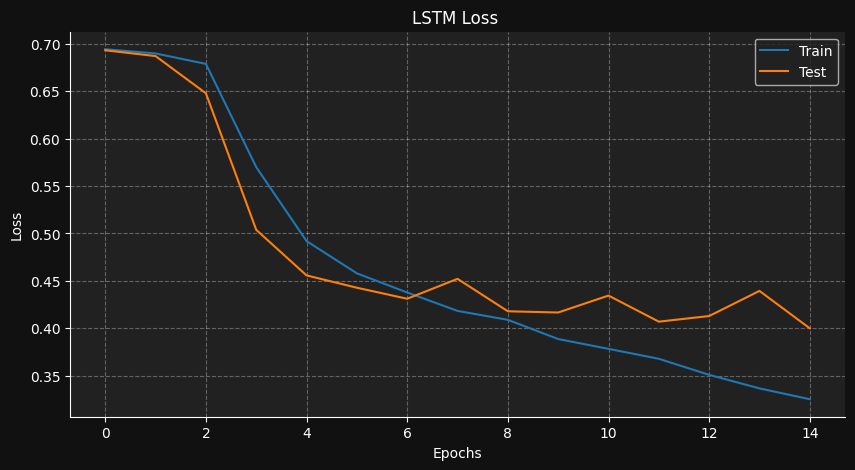

In [61]:
plt.plot(lstm_history.history['accuracy'])
plt.plot(lstm_history.history['val_accuracy'])
plt.title("LSTM Accuracy ")
plt.ylabel("Accuracy")
plt.xlabel("Epochs")
plt.legend(['Train','Test'],loc='best')
plt.show()


plt.plot(lstm_history.history['loss'])
plt.plot(lstm_history.history['val_loss'])
plt.title("LSTM Loss ")
plt.ylabel("Loss")
plt.xlabel("Epochs")
plt.legend(['Train','Test'],loc='best')
plt.show()

In [62]:
score_lstm = lstm.evaluate(X_test,y_test)

313/313 [==============================] - 3s 10ms/step - loss: 0.3999 - accuracy: 0.8171


# Bidirectional LSTM

In [25]:
maxlen = 50

X_train = pad_sequences(train_sequences, maxlen=maxlen, padding='post')
X_test = pad_sequences(valid_sequences, maxlen=maxlen, padding='post')

vec_size = 100
bi_lstm = Sequential()
# Embedding layer
bi_lstm.add(Embedding(input_dim=vocab_size, output_dim=vec_size, input_length=maxlen, trainable=False))
#lstm
bi_lstm.add(Bidirectional(LSTM(50, dropout=0.4, recurrent_dropout=0.4)))
bi_lstm.add(Dense(1,activation='sigmoid'))

In [26]:
bi_lstm.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [27]:
bi_lstm_history = bi_lstm.fit(X_train, y_train, epochs=15, validation_data=(X_test, y_test))

Epoch 1/15
1250/1250 [==============================] - 52s 38ms/step - loss: 0.6717 - accuracy: 0.5800 - val_loss: 0.6490 - val_accuracy: 0.6253
Epoch 2/15
1250/1250 [==============================] - 50s 40ms/step - loss: 0.6481 - accuracy: 0.6227 - val_loss: 0.6371 - val_accuracy: 0.6394
Epoch 3/15
1250/1250 [==============================] - 49s 39ms/step - loss: 0.6402 - accuracy: 0.6291 - val_loss: 0.6223 - val_accuracy: 0.6520
Epoch 4/15
1250/1250 [==============================] - 48s 39ms/step - loss: 0.6330 - accuracy: 0.6372 - val_loss: 0.6093 - val_accuracy: 0.6686
Epoch 5/15
1250/1250 [==============================] - 48s 38ms/step - loss: 0.6189 - accuracy: 0.6504 - val_loss: 0.5925 - val_accuracy: 0.6774
Epoch 6/15
1250/1250 [==============================] - 49s 39ms/step - loss: 0.6076 - accuracy: 0.6608 - val_loss: 0.5841 - val_accuracy: 0.6874
Epoch 7/15
1250/1250 [==============================] - 50s 40ms/step - loss: 0.5996 - accuracy: 0.6696 - val_loss: 0.5738 -

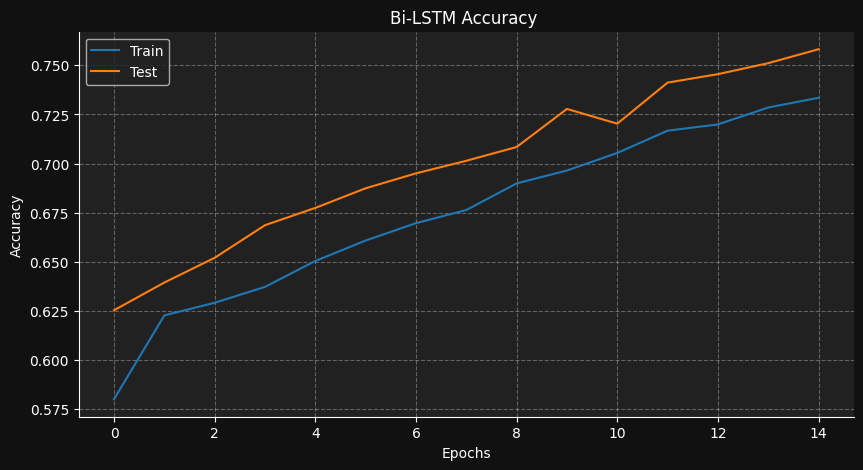

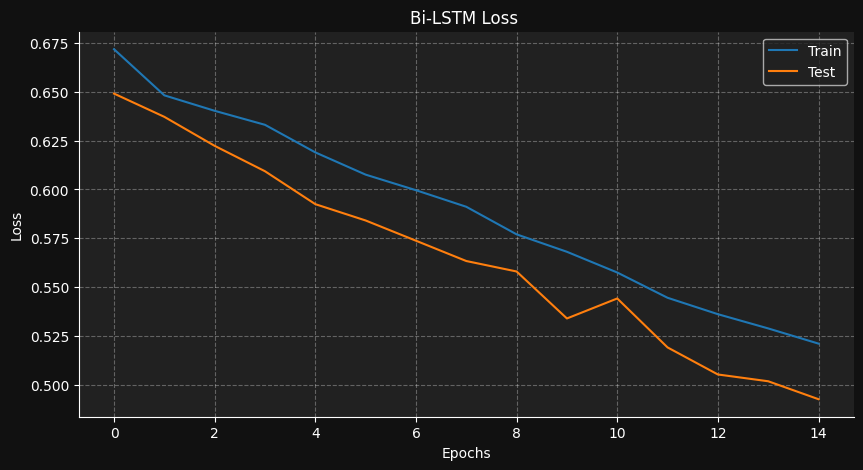

In [28]:
plt.plot(bi_lstm_history.history['accuracy'])
plt.plot(bi_lstm_history.history['val_accuracy'])
plt.title("Bi-LSTM Accuracy ")
plt.ylabel("Accuracy")
plt.xlabel("Epochs")
plt.legend(['Train','Test'],loc='best')
plt.show()


plt.plot(bi_lstm_history.history['loss'])
plt.plot(bi_lstm_history.history['val_loss'])
plt.title("Bi-LSTM Loss ")
plt.ylabel("Loss")
plt.xlabel("Epochs")
plt.legend(['Train','Test'],loc='best')
plt.show()

Недотренировал

In [29]:
score_bilstm = bi_lstm.evaluate(X_test,y_test)


313/313 [==============================] - 4s 13ms/step - loss: 0.4927 - accuracy: 0.7582
